# # T-SNE and UMAP 

Random initialization effect: 
https://www-nature-com.ezproxy.lib.purdue.edu/articles/s41587-020-00809-z

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

from openTSNE import TSNE 
from umap import UMAP

In [2]:
#Generate data 

n = 7000
np.random.seed(42)
X = np.random.randn(n, 3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

(-1.1017018320861423,
 1.1017337649537704,
 -1.1031105661449097,
 1.1031893895831093)

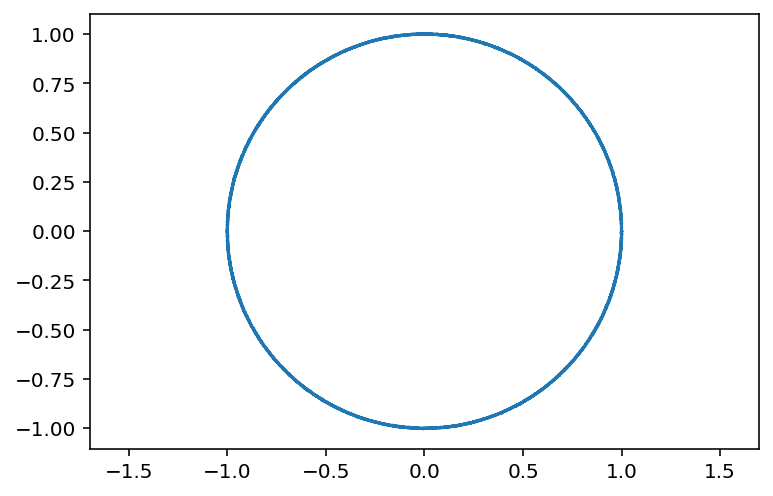

In [9]:
plt.plot(X[:,0], X[:,1])
plt.axis('equal')

In [10]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 48.9 s, sys: 1.25 s, total: 50.1 s
Wall time: 42.5 s


In [11]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

CPU times: user 51.6 s, sys: 692 ms, total: 52.2 s
Wall time: 25.9 s


In [14]:
%%time
from sklearn import decomposition
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 16.7 ms, sys: 7.04 ms, total: 23.8 ms
Wall time: 11.4 ms


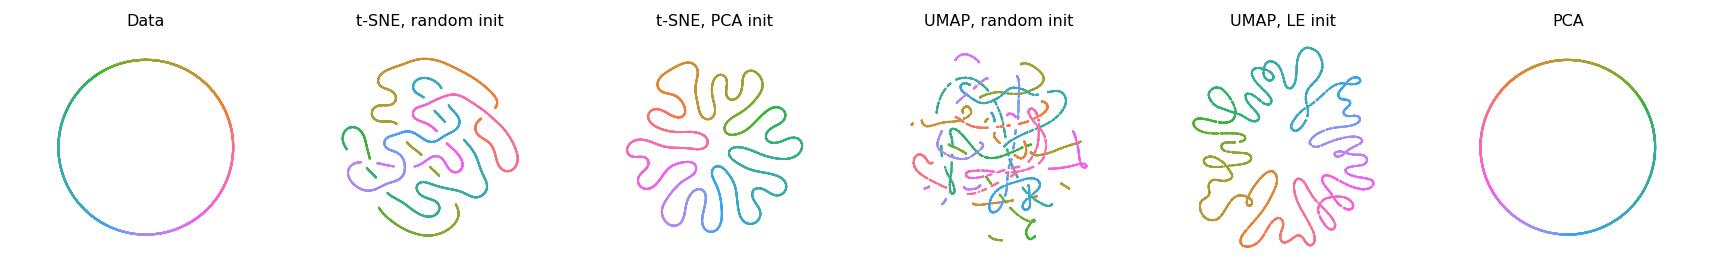

In [18]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 
          'UMAP, random init', 'UMAP, LE init', 'PCA']

plt.figure(figsize=(12,2))

for i,Z in enumerate([X,Z1,Z2,Z3,Z4, Z5],1):
    plt.subplot(1,6,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

#plt.savefig('tsne-umap-circle.png', dpi=300)
#plt.savefig('tsne-umap-circle.pdf', dpi=300)